In [58]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
import os, sys

def get_dir_n_levels_up(path, n):
    # Go up n levels from the given path
    for _ in range(n):
        path = os.path.dirname(path)
    return path

proj_root = get_dir_n_levels_up(os.path.abspath("__file__"), 4)
sys.path.append(proj_root)

import pandas as pd
import yaml
import torch
import collections

import warnings
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

warnings.filterwarnings("ignore")

from dqn.opinion_dynamics.utils.experiment import process_experiment


In [60]:
# experiment_sub_dir = "2025May02-101004_configs" # excellent run
# experiment_sub_dir = "2025Jul09-171538_configs" # good latest run

experiment_sub_dir = "2025Jul22-230458_configs" 

exp_path = os.path.join(os.path.abspath("."), "results", experiment_sub_dir)
df = process_experiment(
    exp_path
)
df.columns


Index(['epoch_type', 'frame_stamp', 'greedy_epsilon', 'episode_rewards_min',
       'episode_rewards_max', 'episode_rewards_mean', 'episode_rewards_median',
       'episode_rewards_std', 'episode_discounted_rewards_min',
       'episode_discounted_rewards_max', 'episode_discounted_rewards_mean',
       'episode_discounted_rewards_median', 'episode_discounted_rewards_std',
       'episode_frames_min', 'episode_frames_max', 'episode_frames_mean',
       'episode_frames_median', 'episode_frames_std', 'episode_losses_min',
       'episode_losses_max', 'episode_losses_mean', 'episode_losses_median',
       'episode_losses_std', 'episode_max_qs_min', 'episode_max_qs_max',
       'episode_max_qs_mean', 'episode_max_qs_median', 'episode_max_qs_std',
       'policy_trained_times', 'target_trained_times', 'epoch_time',
       'sub_exp_cfg_agent_params.args_.betas', 'sub_experiment_path', 'seed',
       'experiment_name'],
      dtype='object')

In [61]:
df

,epoch_type,frame_stamp,greedy_epsilon,episode_rewards_min,episode_rewards_max,episode_rewards_mean,episode_rewards_median,episode_rewards_std,episode_discounted_rewards_min,episode_discounted_rewards_max,...,episode_max_qs_mean,episode_max_qs_median,episode_max_qs_std,policy_trained_times,target_trained_times,epoch_time,sub_exp_cfg_agent_params.args_.betas,sub_experiment_path,seed,experiment_name
0,training,200000,0.983159,-8.326309,-1.753038,-4.592401,-4.577772,0.903919,-7.721414,-1.711293,...,1.283540e+00,1.327577e+00,8.465321e-01,48749.0,192.0,0 days 00:08:54.605147,[2],d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.betas__2_
1,training,400000,0.965886,-7.615862,-1.546325,-4.514992,-4.493192,0.869012,-7.110927,-1.511523,...,-5.257322e-01,-2.721288e-01,8.682423e-01,50000.0,200.0,0 days 00:10:29.428255,[2],d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.betas__2_
2,training,600000,0.948614,-7.414289,-1.636655,-4.328403,-4.291821,0.815559,-6.935630,-1.593048,...,-8.804132e-01,-5.609735e-01,1.127573e+00,50000.0,200.0,0 days 00:10:42.499611,[2],d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.betas__2_
3,training,800000,0.931341,-7.320679,-1.816742,-4.163227,-4.141168,0.775562,-6.858114,-1.774391,...,-9.395088e-01,-6.062496e-01,1.184339e+00,50000.0,200.0,0 days 00:10:26.089037,[2],d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.betas__2_
4,training,1000000,0.914068,-6.952743,-1.486697,-4.034288,-4.015768,0.754639,-6.540969,-1.451428,...,-9.514094e-01,-6.216228e-01,1.180414e+00,50000.0,200.0,0 days 00:10:23.991658,[2],d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.betas__2_
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,validation,11200000,NaN,-81.693853,-49.031325,-62.085994,-62.060023,13.519485,-47.012201,-28.225610,...,2.926683e+11,2.891659e+11,1.380721e+11,NaN,NaN,0 days 00:00:01.556040,"[0, 1, 2]",d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,2,0001_agent_params.args_.betas__0__1__2_
716,validation,11400000,NaN,-81.693853,-49.031325,-63.955775,-62.080023,12.451693,-47.012201,-28.225610,...,2.781431e+11,2.747105e+11,1.324764e+11,NaN,NaN,0 days 00:00:01.564644,"[0, 1, 2]",d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,2,0001_agent_params.args_.betas__0__1__2_
717,validation,11600000,NaN,-81.697863,-49.031325,-66.758324,-62.080023,13.844008,-47.012201,-28.225610,...,2.626131e+11,2.549386e+11,1.361176e+11,NaN,NaN,0 days 00:00:01.591574,"[0, 1, 2]",d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,2,0001_agent_params.args_.betas__0__1__2_
718,validation,11800000,NaN,-81.693853,-49.011325,-62.088818,-62.080023,13.526334,-47.012201,-28.219683,...,2.927285e+11,2.891695e+11,1.381545e+11,NaN,NaN,0 days 00:00:01.583336,"[0, 1, 2]",d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,2,0001_agent_params.args_.betas__0__1__2_


In [62]:
df[df['epoch_type'] == 'validation']
# df[df['epoch_type'] == 'training']


,epoch_type,frame_stamp,greedy_epsilon,episode_rewards_min,episode_rewards_max,episode_rewards_mean,episode_rewards_median,episode_rewards_std,episode_discounted_rewards_min,episode_discounted_rewards_max,...,episode_max_qs_mean,episode_max_qs_median,episode_max_qs_std,policy_trained_times,target_trained_times,epoch_time,sub_exp_cfg_agent_params.args_.betas,sub_experiment_path,seed,experiment_name
60,validation,200000,NaN,-8.220317,-5.012620,-6.427556,-6.158563,1.329894,-7.663682,-4.719459,...,-5.023709e-02,9.977977e-02,5.126866e-01,NaN,NaN,0 days 00:00:01.802061,[2],d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.betas__2_
61,validation,400000,NaN,-7.952450,-4.813758,-6.263972,-5.922172,1.296153,-7.437735,-4.547464,...,-1.050469e+00,-6.428194e-01,1.319296e+00,NaN,NaN,0 days 00:00:01.773969,[2],d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.betas__2_
62,validation,600000,NaN,-7.726103,-4.760090,-6.114068,-5.856086,1.224485,-7.244350,-4.498977,...,-1.365751e+00,-8.933189e-01,1.574652e+00,NaN,NaN,0 days 00:00:01.825276,[2],d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.betas__2_
63,validation,800000,NaN,-7.431142,-4.503851,-5.794459,-5.448413,1.219829,-6.992588,-4.273507,...,-1.408648e+00,-8.978674e-01,1.644377e+00,NaN,NaN,0 days 00:00:02.393125,[2],d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.betas__2_
64,validation,1000000,NaN,-7.219294,-4.434892,-5.665697,-5.342917,1.159382,-6.809104,-4.210466,...,-1.387515e+00,-8.701264e-01,1.619920e+00,NaN,NaN,0 days 00:00:02.289255,[2],d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.betas__2_
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,validation,11200000,NaN,-81.693853,-49.031325,-62.085994,-62.060023,13.519485,-47.012201,-28.225610,...,2.926683e+11,2.891659e+11,1.380721e+11,NaN,NaN,0 days 00:00:01.556040,"[0, 1, 2]",d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,2,0001_agent_params.args_.betas__0__1__2_
716,validation,11400000,NaN,-81.693853,-49.031325,-63.955775,-62.080023,12.451693,-47.012201,-28.225610,...,2.781431e+11,2.747105e+11,1.324764e+11,NaN,NaN,0 days 00:00:01.564644,"[0, 1, 2]",d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,2,0001_agent_params.args_.betas__0__1__2_
717,validation,11600000,NaN,-81.697863,-49.031325,-66.758324,-62.080023,13.844008,-47.012201,-28.225610,...,2.626131e+11,2.549386e+11,1.361176e+11,NaN,NaN,0 days 00:00:01.591574,"[0, 1, 2]",d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,2,0001_agent_params.args_.betas__0__1__2_
718,validation,11800000,NaN,-81.693853,-49.011325,-62.088818,-62.080023,13.526334,-47.012201,-28.219683,...,2.927285e+11,2.891695e+11,1.381545e+11,NaN,NaN,0 days 00:00:01.583336,"[0, 1, 2]",d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,2,0001_agent_params.args_.betas__0__1__2_


In [63]:
# Define hyperparameter columns
hyperparam_columns = [col for col in df.columns if "sub_exp_cfg" in col]

# Group by hyperparameter values and compute mean episode_rewards_mean
averaged_results = df.groupby(hyperparam_columns, as_index=False).agg({
    'episode_rewards_mean': 'mean',  # Averaging the performance metric
    'sub_experiment_path': 'first'   # Keep a reference to an experiment path
})

# Find the best hyperparameter set based on the highest mean reward
best_row = averaged_results.loc[averaged_results['episode_rewards_mean'].idxmax()]

# Print the best experiment path and hyperparameters
print(f"Best hyperparameters:\n{best_row[hyperparam_columns]}")
print(f"Best mean reward: {best_row['episode_rewards_mean']}")

Best hyperparameters:
sub_exp_cfg_agent_params.args_.betas    [2]
Name: 1, dtype: object
Best mean reward: -4.505248623005085


In [64]:
averaged_results

,sub_exp_cfg_agent_params.args_.betas,episode_rewards_mean,sub_experiment_path
0,"[0, 1, 2]",-53.542179,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...
1,[2],-4.505249,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...


In [65]:
# selected_metric = 'episode_rewards_mean'
# hue_col = "sub_exp_cfg_agent_params.args_.action_w_noise_amplitude"

# # Filter for validation episodes
# validation_df = df[df['epoch_type'] == 'validation']

# # Get the unique sorted frame_stamp values
# unique_frames = np.sort(validation_df['frame_stamp'].unique())
# N = 1
# # Get all frame_stamp values after the first N unique ones
# filtered_frames = unique_frames[N:]

# # Filter the DataFrame to only include rows with these frame_stamp values
# filtered_df = validation_df[validation_df['frame_stamp'].isin(filtered_frames)]

# plt.figure(figsize=(10, 6))
# sns.lineplot(data=filtered_df, x='frame_stamp', y=selected_metric, hue=hue_col)
# plt.ylabel(selected_metric)
# plt.xlabel('Frame Stamp')
# plt.show()

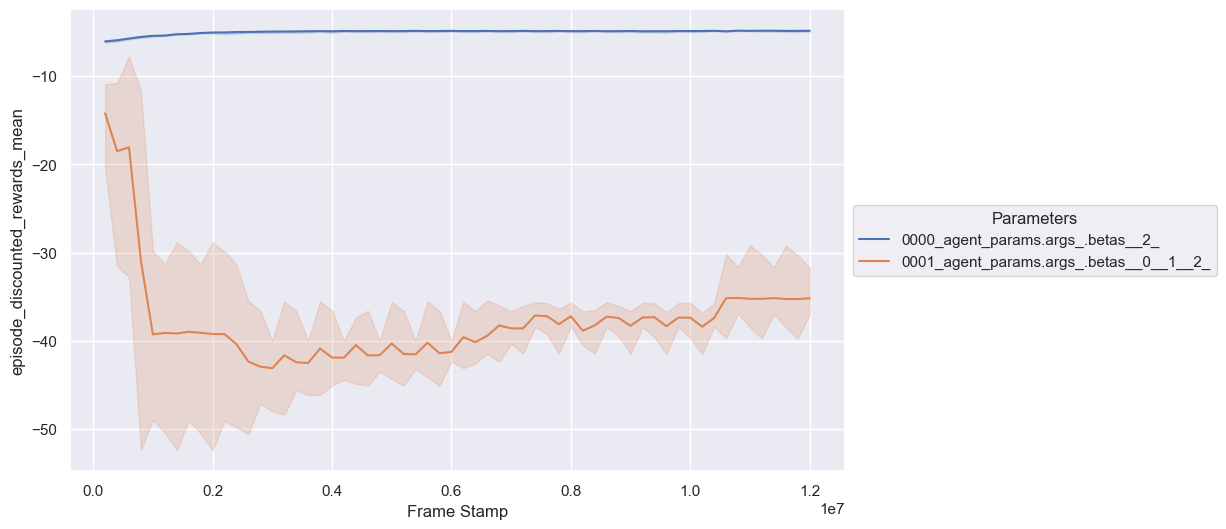

In [66]:

selected_metric = 'episode_discounted_rewards_mean'
# hue_col = "sub_exp_cfg_agent_params.args_.action_w_noise_amplitude"
hue_col = "experiment_name"

validation_df = df[df['epoch_type'] == 'validation']
# validation_df = df[df['epoch_type'] == 'training']


# Create a new figure for each environment
plt.figure(figsize=(10, 6))
# sns.lineplot(data=df, x='frame_stamp', y=selected_metric, hue='model')
sns.lineplot(data=validation_df, 
             x='frame_stamp', 
             y=selected_metric, 
             hue=hue_col,
            #  units='seed', # Comment this to see mean + cf
            #  estimator=None, # Comment this to see mean + cf
             )

plt.ylabel(selected_metric)
plt.xlabel('Frame Stamp')

# Place the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Parameters')
plt.show()

In [67]:
df.columns

Index(['epoch_type', 'frame_stamp', 'greedy_epsilon', 'episode_rewards_min',
       'episode_rewards_max', 'episode_rewards_mean', 'episode_rewards_median',
       'episode_rewards_std', 'episode_discounted_rewards_min',
       'episode_discounted_rewards_max', 'episode_discounted_rewards_mean',
       'episode_discounted_rewards_median', 'episode_discounted_rewards_std',
       'episode_frames_min', 'episode_frames_max', 'episode_frames_mean',
       'episode_frames_median', 'episode_frames_std', 'episode_losses_min',
       'episode_losses_max', 'episode_losses_mean', 'episode_losses_median',
       'episode_losses_std', 'episode_max_qs_min', 'episode_max_qs_max',
       'episode_max_qs_mean', 'episode_max_qs_median', 'episode_max_qs_std',
       'policy_trained_times', 'target_trained_times', 'epoch_time',
       'sub_exp_cfg_agent_params.args_.betas', 'sub_experiment_path', 'seed',
       'experiment_name'],
      dtype='object')

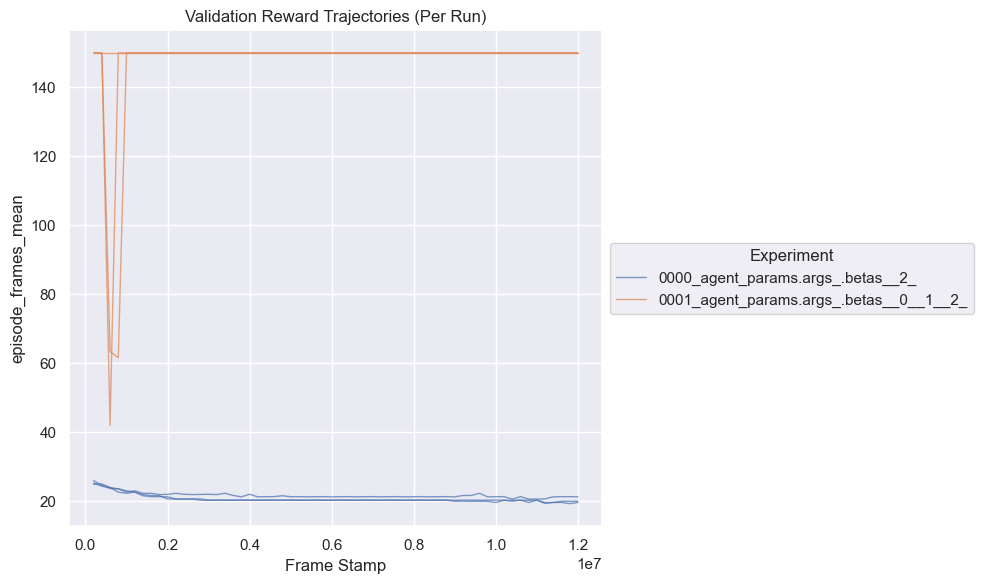

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

selected_metric = 'episode_frames_mean'
hue_col = "experiment_name"  # or another distinguishing column like "sub_experiment_path"

validation_df = df[df['epoch_type'] == 'validation']

# Plot individual lines for each run
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=validation_df,
    x='frame_stamp',
    y=selected_metric,
    hue=hue_col,
    estimator=None,  # ← disables aggregation
    units='sub_experiment_path',  # ← groups lines by unique run
    lw=1,  # line width
    alpha=0.7  # transparency
)

plt.ylabel(selected_metric)
plt.xlabel('Frame Stamp')
plt.title('Validation Reward Trajectories (Per Run)')

# Move legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Experiment')
plt.tight_layout()
plt.show()


In [69]:
### Select data

experiment_columns = [
    'epoch_type', 'frame_stamp',
    'episode_rewards_mean', 'episode_frames_mean', 
    'episode_discounted_rewards_mean',
    'policy_trained_times', 'target_trained_times', 'epoch_time', 
       'seed', 'experiment_name', "sub_experiment_path"
]
hyperparam_columns = [
   col for col in df.columns if "sub_exp_cfg" in col
]

cols_of_interest = experiment_columns + hyperparam_columns

sub_df = df[cols_of_interest]
sub_df = sub_df[sub_df['epoch_type'] == 'validation']
sub_df = sub_df[sub_df['frame_stamp'] == sub_df['frame_stamp'].max()]

sub_df 


,epoch_type,frame_stamp,episode_rewards_mean,episode_frames_mean,episode_discounted_rewards_mean,policy_trained_times,target_trained_times,epoch_time,seed,experiment_name,sub_experiment_path,sub_exp_cfg_agent_params.args_.betas
119,validation,12000000,-5.048350,19.666667,-4.814640,NaN,NaN,0 days 00:00:02.078784,0,0000_agent_params.args_.betas__2_,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,[2]
239,validation,12000000,-5.202313,21.297872,-4.945702,NaN,NaN,0 days 00:00:02.434287,1,0000_agent_params.args_.betas__2_,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,[2]
359,validation,12000000,-5.059365,20.000000,-4.823812,NaN,NaN,0 days 00:00:02.270061,2,0000_agent_params.args_.betas__2_,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,[2]
479,validation,12000000,-65.786319,150.000000,-36.952266,NaN,NaN,0 days 00:00:01.591002,0,0001_agent_params.args_.betas__0__1__2_,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,"[0, 1, 2]"
599,validation,12000000,-51.413879,150.000000,-31.723566,NaN,NaN,0 days 00:00:01.571145,1,0001_agent_params.args_.betas__0__1__2_,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,"[0, 1, 2]"
719,validation,12000000,-63.960840,150.000000,-36.832783,NaN,NaN,0 days 00:00:01.586117,2,0001_agent_params.args_.betas__0__1__2_,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,"[0, 1, 2]"


In [70]:
agg_cols = [col for col in sub_df.columns if "sub_exp_cfg" in col]
aggregated_df = (
    sub_df.groupby(agg_cols)
    .agg(episode_discounted_rewards_mean=("episode_discounted_rewards_mean", "mean"))
    .reset_index()
)
aggregated_df

,sub_exp_cfg_agent_params.args_.betas,episode_discounted_rewards_mean
0,"[0, 1, 2]",-35.169538
1,[2],-4.861385


In [71]:
sub_df.columns

Index(['epoch_type', 'frame_stamp', 'episode_rewards_mean',
       'episode_frames_mean', 'episode_discounted_rewards_mean',
       'policy_trained_times', 'target_trained_times', 'epoch_time', 'seed',
       'experiment_name', 'sub_experiment_path',
       'sub_exp_cfg_agent_params.args_.betas'],
      dtype='object')

In [72]:
print(sub_df[sub_df['episode_rewards_mean'] == sub_df['episode_rewards_mean'].max()]['sub_experiment_path'].values[0])



d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dynamics\experiments\results\2025Jul22-230458_configs\0000_agent_params.args_.betas__2_\0


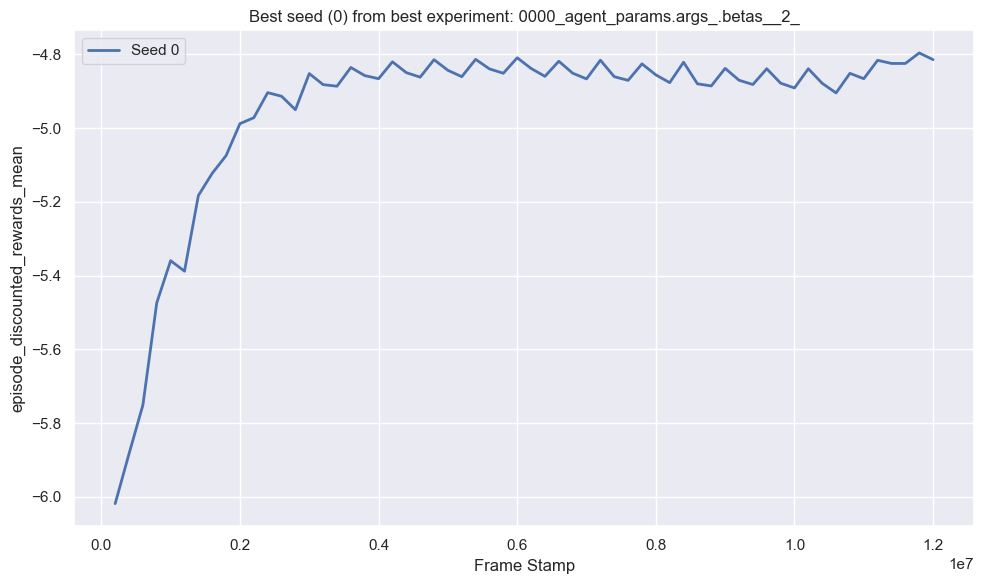

In [73]:
selected_metric = 'episode_discounted_rewards_mean'
hue_col = "experiment_name"

# Filter for training data only
# training_df = df[df['epoch_type'] == 'training']
training_df = df[df['epoch_type'] == 'validation']

# Step 1: Find best experiment
experiment_means = training_df.groupby(hue_col)[selected_metric].mean()
best_experiment = experiment_means.idxmax()

# Step 2: Filter to that experiment
best_exp_df = training_df[training_df[hue_col] == best_experiment]

# Step 3: Find best seed within best experiment
best_seed = (
    best_exp_df.groupby('seed')[selected_metric]
    .mean()
    .idxmax()
)

# Step 4: Filter to best seed
best_seed_df = best_exp_df[best_exp_df['seed'] == best_seed]

# Step 5: Plot
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=best_seed_df,
    x='frame_stamp',
    y=selected_metric,
    lw=2,
    label=f"Seed {best_seed}"
)

plt.title(f"Best seed ({best_seed}) from best experiment: {best_experiment}")
plt.ylabel(selected_metric)
plt.xlabel('Frame Stamp')
plt.legend()
plt.tight_layout()
plt.show()

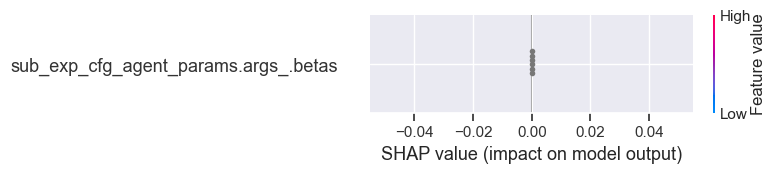

In [74]:
import shap
import xgboost
import pandas as pd


# Define the target metric and hyperparameter columns
target_metric = "episode_rewards_mean"  # Replace with actual metric column name
# Replace with actual hyperparameter column names

# Prepare data
X = sub_df[hyperparam_columns].apply(pd.to_numeric, errors='coerce')
y = sub_df[target_metric].fillna(3 * sub_df[target_metric].min())

# Train an XGBoost model to analyze feature importance
model = xgboost.XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
model.fit(X, y)

# SHAP analysis
explainer = shap.Explainer(model)
shap_values = explainer(X)

# Summary plot (feature importance)
shap.summary_plot(shap_values, X)

In [75]:
hyperparam_columns

['sub_exp_cfg_agent_params.args_.betas']

In [76]:
import plotly.express as px

# Define readable names for selected hyperparams
readable_names = {
    hyperparam_columns[0]: "noise",
    hyperparam_columns[1]: "size"
}

# Rename columns in a copy of the dataframe
plot_df = sub_df.rename(columns=readable_names)

# Assign new column names
x_col = "noise"
y_col = "episode_rewards_mean"
facet_col = "size"

# Plot
fig = px.scatter(
    plot_df,
    x=x_col,
    y=y_col,
    color="experiment_name",  # Optional: color by experiment
    facet_col=facet_col,
    title="Episode Rewards vs. Noise Faceted by Size",
    height=600
)

fig.update_layout(showlegend=False)
fig.show()


IndexError: list index out of range